# Setup

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [66]:
df = pd.read_csv('ca-oshpd-adveventhospitalizationspsi-county2005-2015q3.csv')

# Descriptory Information

In [67]:
df.head(20)

,Year,County,PSI,PSIDescription,Count,Population,ObsRate
0,2005,STATEWIDE,21,Retained Surgical Item or Unretrieved Device F...,321,"26,447,738",1.21
1,2006,STATEWIDE,21,Retained Surgical Item or Unretrieved Device F...,341,"26,679,904",1.28
2,2007,STATEWIDE,21,Retained Surgical Item or Unretrieved Device F...,353,"26,935,982",1.31
3,2008,STATEWIDE,21,Retained Surgical Item or Unretrieved Device F...,346,"27,272,108",1.27
4,2009,STATEWIDE,21,Retained Surgical Item or Unretrieved Device F...,308,"27,630,962",1.11
5,2010,STATEWIDE,21,Retained Surgical Item or Unretrieved Device F...,292,"28,000,783",1.04
6,2011,STATEWIDE,21,Retained Surgical Item or Unretrieved Device F...,305,"28,396,854",1.07
7,2012,STATEWIDE,21,Retained Surgical Item or Unretrieved Device F...,290,"27,818,703",1.04
8,2013,STATEWIDE,21,Retained Surgical Item or Unretrieved Device F...,255,"28,195,720",0.90
9,2014,STATEWIDE,21,Retained Surgical Item or Unretrieved Device F...,235,"28,842,368",0.81


In [68]:
df.describe()

,Year,PSI,ObsRate
count,4543.000000,4543.00000,4543.000000
mean,2010.000000,24.00000,11.663159
std,3.162626,2.00022,15.894882
min,2005.000000,21.00000,0.000000
25%,2007.000000,22.00000,0.000000
50%,2010.000000,24.00000,3.780000
75%,2013.000000,26.00000,20.360000
max,2015.000000,27.00000,198.220000


#### What are the most common PSI descriptions?

In [69]:
psi = df['PSIDescription'].unique()
print(psi)

['Retained Surgical Item or Unretrieved Device Fragment'
 'Iatrogenic Pneumothorax'
 'Central Venous Catheter-Related Blood Stream Infection'
 'Postoperative Wound Dehiscence' 'Accidental Puncture or Laceration'
 'Transfusion Reaction' 'Perioperative Hemorrhage or Hematoma']


In [70]:
d = {'Retained Surgical Item or Unretrieved Device Fragment': 0, 
     'Iatrogenic Pneumothorax': 0,
     'Central Venous Catheter-Related Blood Stream Infection': 0,
     'Postoperative Wound Dehiscence': 0,
     'Accidental Puncture or Laceration': 0,
     'Transfusion Reaction': 0,
     'Perioperative Hemorrhage or Hematoma': 0}

In [71]:
for x in df['PSIDescription']:
    for key in d:
        if key == x:
            d[key] = d[key] + 1
print(d)

{'Retained Surgical Item or Unretrieved Device Fragment': 649, 'Iatrogenic Pneumothorax': 649, 'Central Venous Catheter-Related Blood Stream Infection': 649, 'Postoperative Wound Dehiscence': 649, 'Accidental Puncture or Laceration': 649, 'Transfusion Reaction': 649, 'Perioperative Hemorrhage or Hematoma': 649}


# Data Cleaning

In [72]:
df['County'] = df['County'].replace('STATEWIDE', 'Statewide')  # Ensures that statewide is in proper casing for clarity

In [73]:
# Three counties are dropped as they contain missing data and they are the smallest in population

df = df[df.County != 'Alpine']
df = df[df.County != 'Sierra']
df = df[df.County != 'Modoc']
df = df[df.County != 'Mono']
df = df[df.County != 'Trinity']
df = df[df.County != 'Mariposa']

# EDA

In [74]:
df_pair = df
df_pair = df_pair.drop('County', axis=1)
df_pair.head()

,Year,PSI,PSIDescription,Count,Population,ObsRate
0,2005,21,Retained Surgical Item or Unretrieved Device F...,321,"26,447,738",1.21
1,2006,21,Retained Surgical Item or Unretrieved Device F...,341,"26,679,904",1.28
2,2007,21,Retained Surgical Item or Unretrieved Device F...,353,"26,935,982",1.31
3,2008,21,Retained Surgical Item or Unretrieved Device F...,346,"27,272,108",1.27
4,2009,21,Retained Surgical Item or Unretrieved Device F...,308,"27,630,962",1.11


C:\Users\m_kab\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\m_kab\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\m_kab\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\m_kab\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\m_kab\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\m_kab\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data

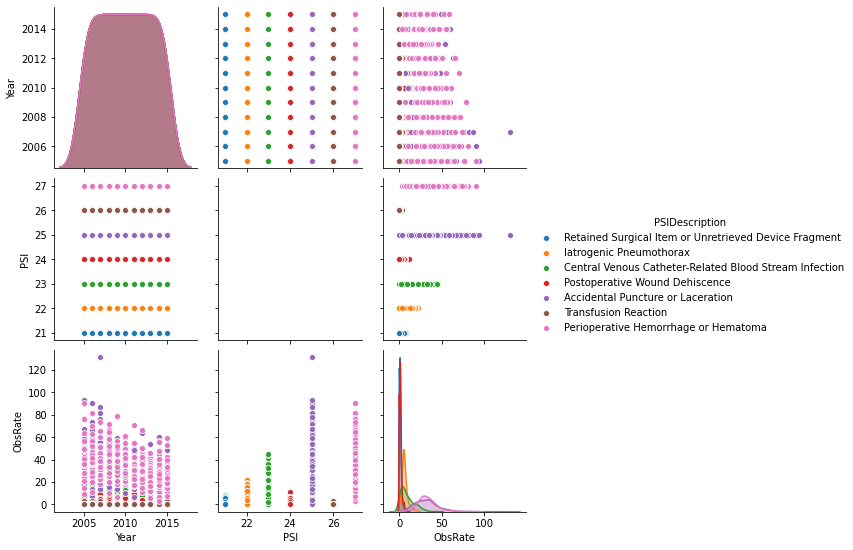

In [75]:
sns.pairplot(df_pair, hue='PSIDescription')

#### Looking into a pairplot with just ObsRate

In [76]:
obs_rate = df_pair
obs_rate = obs_rate.drop('Year', axis=1)
obs_rate = obs_rate.drop('PSI', axis=1)
obs_rate = obs_rate.drop('Count', axis=1)
obs_rate = obs_rate.drop('Population', axis=1)
obs_rate.head()

,PSIDescription,ObsRate
0,Retained Surgical Item or Unretrieved Device F...,1.21
1,Retained Surgical Item or Unretrieved Device F...,1.28
2,Retained Surgical Item or Unretrieved Device F...,1.31
3,Retained Surgical Item or Unretrieved Device F...,1.27
4,Retained Surgical Item or Unretrieved Device F...,1.11


C:\Users\m_kab\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


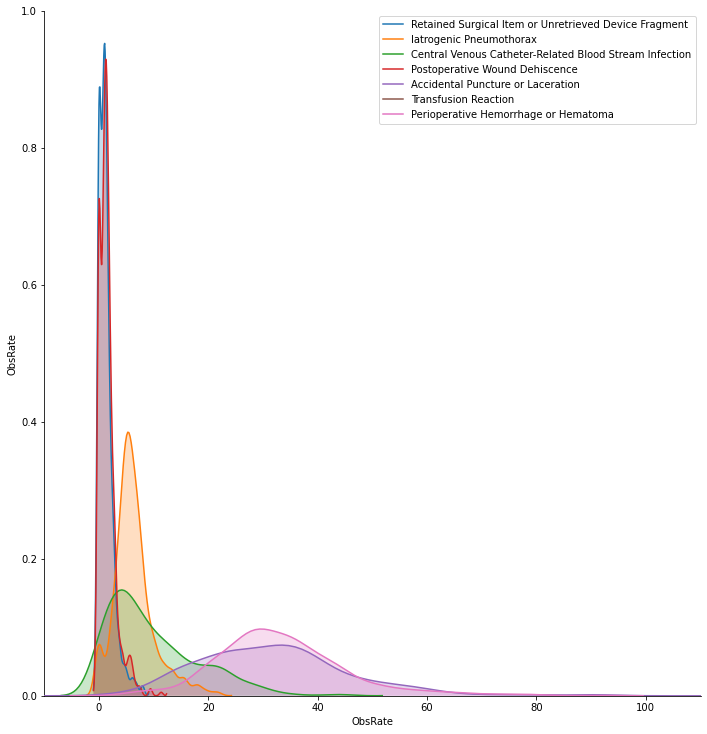

In [77]:
p = sns.pairplot(obs_rate, hue='PSIDescription', height=10)
plt.legend(labels=psi)
p._legend.remove()    # Removes default legend as it is not showing (only has new legend)
p.axes[0,0].set_xlim((-10,110))    # Improves plot visuals
plt.show()

In [78]:
# All are mostly normally distributed (some are more so than others)

#### Correlation matrix

In [79]:
corr = df.corr()

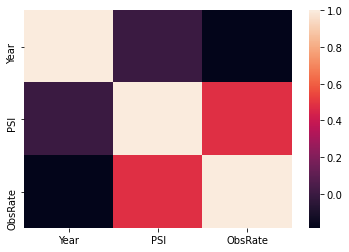

In [80]:
sns.heatmap(corr)

In [81]:
# It has been found that the most significant relationship is between the PSI and the observation rate

#### Barplot for PSI and ObsRate

Text(0, 0.5, 'Observation Rate (per 100,000 population)')

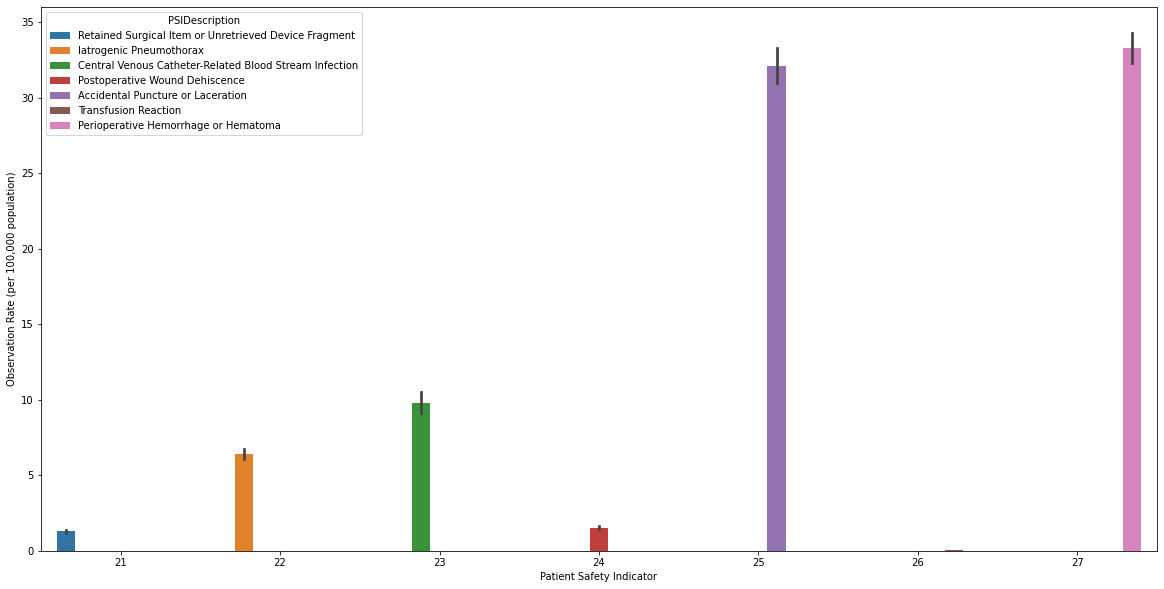

In [82]:
f, ax = plt.subplots(figsize=(20,10))
sns.barplot(x=df['PSI'], y='ObsRate', hue='PSIDescription', data=df)

# Renaming labels for better understanding
plt.xlabel('Patient Safety Indicator')
plt.ylabel('Observation Rate (per 100,000 population)')

In [ ]:
# Most iatrogenic events occur with Accidental Puncture or Laceration, and Perioperative Hemorrahage or Hematoma. With
# them removed, the rest of the bars appear to be normally distributed.